### Курсовой проект
В проектной работе хотел бы сделать анализ по годам выпуска фильма по данным imdb.com.<br>
1.По годам выпуска рассчитать основные статистические показатели: Мода, медиана, квартили, дисперсию.<br>
2.Проверить, работает ли нормальное распределение и Паретто.<br>
3.Проверить есть ли зависимость бюджетов, рейтингов, жанров от года выпуска фильмов.<br>
4.Посмотреть поведение год выпуска во времени.<br>
В идеале, хотел бы сделать прогноз на 2020 год: какие жанры с какой вероятностью выйдут определенное количество фильмов с определенным бюджетом и из какой страны<br>

In [111]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
from scipy import stats

Подготовительные работы, загрузка файлов, их сведение в датафрейм summary

In [112]:
akas = pd.read_csv('data_akas.csv', sep='\t', low_memory=False)

In [113]:
ratings = pd.read_csv('data_ratings.csv', sep='\t', low_memory=False)

In [114]:
basics = pd.read_csv('data_basics.csv', sep='\t', low_memory=False)

In [115]:
basics_f = basics[(basics['titleType'] == 'movie') & (basics['startYear'] != '\\N') & (basics['genres'] != '\\N')]
basics_f['genre'] = basics_f['genres'].str.split(',', expand=True)[0]
basics_f = basics_f.drop(columns=['isAdult', 'endYear', 'runtimeMinutes', 'genres', 'primaryTitle'])

C:\Program Files\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [116]:
summary = pd.merge(basics_f, ratings, on='tconst', how='inner')

Серии genres и years нам пригодятся дальше

In [117]:
genres = summary['genre'].unique()
genres

array(['Romance', 'Documentary', 'Biography', 'Drama', 'Adventure',
       'Comedy', 'Crime', 'Sci-Fi', 'History', 'War', 'Action', 'Western',
       'Horror', 'Fantasy', 'Mystery', 'Animation', 'Musical', 'Thriller',
       'Music', 'Film-Noir', 'Family', 'Sport', 'Adult', 'News',
       'Game-Show', 'Reality-TV'], dtype=object)

In [118]:
years = np.sort(summary['startYear'].unique())

Функция, которая считает какого жанра было выпущено в каждом году и формирует по окончанию numpy-массив

In [82]:
def count_genres(genre):
    SpisokZhanrov = genres.tolist()
    KolvoVGodu = []
    for i in years:
        ZhanryZaGod = summary[summary['startYear'] == i]
        ZhanryZaGodBezGodv = ZhanryZaGod['genre']
        listgenres = ZhanryZaGodBezGodv.tolist()
        cnt = Counter(listgenres)
        #print(i)
        #print(cnt)
        KolvoVGodu.append(cnt[genre])
    kolvo_array = np.array(KolvoVGodu)
    return kolvo_array

## Задание 1
Проведем расчет Моды, медианы, квартиля и дисперсии для жанра "Драма"

In [98]:
array_drama = count_genres('Drama')

dtype('int32')

In [92]:
drama_mean = np.mean(array_drama)
drama_mean

530.7741935483871

In [93]:
drama_median = np.median(array_drama)
drama_median

428.0

In [96]:
drama_mode = stats.mode(array_drama, axis=None)
drama_mode

ModeResult(mode=array([0]), count=array([9]))

In [100]:
drama_d = pow(np.std(array_drama),2)
drama_d

23.513123318088873

Изобразим квантили при помощи графика seaborn

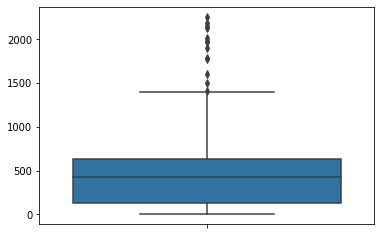

In [101]:
import seaborn as sns
sns.boxplot(array_drama, orient='v')
plt.show()

## Задание 2
Проверим работает ли распределение Паретто на данном массиве:

((array([-2.53800609, -2.21068797, -2.02236027, -1.88655026, -1.77861723,
         -1.68814065, -1.60968827, -1.54005223, -1.47717282, -1.41964516,
         -1.36646612, -1.31689327, -1.27036092, -1.22642763, -1.18474196,
         -1.14501925, -1.10702556, -1.0705661 , -1.03547686, -1.00161834,
         -0.9688708 , -0.93713066, -0.90630763, -0.87632249, -0.84710529,
         -0.81859393, -0.79073298, -0.76347273, -0.73676838, -0.7105794 ,
         -0.68486897, -0.65960351, -0.63475227, -0.61028702, -0.58618175,
         -0.56241239, -0.53895663, -0.51579374, -0.49290436, -0.47027037,
         -0.4478748 , -0.42570166, -0.40373589, -0.38196323, -0.36037016,
         -0.33894385, -0.31767203, -0.29654301, -0.27554557, -0.25466893,
         -0.23390271, -0.21323688, -0.19266173, -0.17216782, -0.15174598,
         -0.13138724, -0.11108281, -0.09082408, -0.07060257, -0.05040988,
         -0.03023773, -0.01007788,  0.01007788,  0.03023773,  0.05040988,
          0.07060257,  0.09082408,  0.

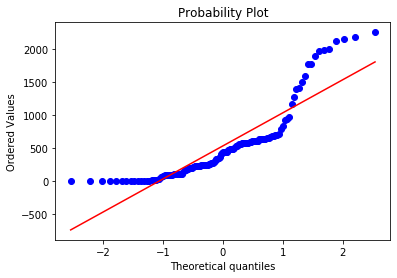

In [105]:
from scipy import stats
import seaborn as sns
stats.probplot(array_drama, plot=sns.mpl.pyplot)

## Задание 3 и 4

Пронаблюдаем зависимость межу количеством драм и комедий. Для это сгенерируем массив для комедии

In [107]:
array_comedy = count_genres('Comedy')

In [108]:
coeff = np.corrcoef(array_drama, array_comedy)
coeff

array([[1.       , 0.9916456],
       [0.9916456, 1.       ]])

Наблюдаем явную прямую зависимость

Пронаблюдаем зависимость межу количеством драм и вестенов. Для это сгенерируем массив для комедии

In [109]:
array_western = count_genres('Western')

In [110]:
coeff2 = np.corrcoef(array_drama, array_western)
coeff2

array([[ 1.        , -0.12999565],
       [-0.12999565,  1.        ]])

Наблюдаем очень слабую обратну зависимость